# Mencari harga mobil bekas yang ideal
Studi kasus dari **cognitiveclass.ai** Kelas "Data Analysis with Python" oleh @solehudindt



In [ ]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header = None)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location",
           "wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke",
           "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
# df = pd.read_csv(url, names = headers)

df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


# Sekilas Insight

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

tipe data **bore** seharusnya bukan berupa object karena bore berisi *diameter of each cylinder in engine* sesuai dengan keterangan dataset bahwa data *continuous from 2.54 to 3.94.*, selain bore ada **normalized-losses , stroke, horsepower, peak-rpm dan price**

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


describe digunakan untuk melihat perhitungan umum dasar dataset yang mempunyai tipe data yang bisa dihitung(include all menambah seluruh tipe data:notice unique, freq, top) atau istilahnya *statistical summary*

In [ ]:
df[["symboling", "normalized-losses"]].describe()

,symboling
count,205.000000
mean,0.834146
std,1.245307
min,-2.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Preprocessing

### Missing Values

In [ ]:
# replace data yang bernilai "?"(sesuai keterangan dari iformasi dataset) menjadi NaN untuk memudahkan identifikasi
df.replace("?", np.NaN, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# cek missing data. bisa menggunakan isnull() atau notnull()
missing_data = df.isnull()

# missing_data.columns.values
# menghitung missing values per kolom dengan for
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")  
# missing_data.head()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## <h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row(<b>price</b>, karena variabel dependant)<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean(<b>norm-loss, stroke, bore, horsepower, dan peak-rpm</b>)<br>
        b. Replace it by frequency(<b>num-of-doors</b>)<br>
        c. Replace it based on other functions
    </li>
</ol>

Berdasarkan mean

In [ ]:
mean_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
#print("mean norm loss : ", mean_norm_loss)
df["normalized-losses"].replace(np.nan, mean_norm_loss, inplace=True)

In [ ]:
mean_stroke = df["stroke"].astype("float").mean(axis=0)
#print("mean stroke : ", mean_stroke)
df["stroke"].replace(np.nan, mean_stroke, inplace=True)

In [ ]:
mean_bore = df["bore"].astype("float").mean(axis=0)
# print("mean bore: ", mean_bore)
df["bore"].replace(np.nan, mean_bore, inplace=True)

In [ ]:
mean_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, mean_horsepower, inplace=True)

In [ ]:
mean_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, mean_peakrpm, inplace=True)

In [ ]:
## lebih clean tapi NGGA JALAN LOL
# def change_mean(col):
#     mean_col = col.astype("float").mean(axis=0)
#     col.replace(np.nan, mean_col, inplace=True)
#     return col

# # df[["normalized-losses","stroke","bore","peak-rpm", "horsepower"]].apply(lambda col: col.replace(np.nan, col.astype("float").mean(), inplace=True))
# df[["normalized-losses","stroke","bore","peak-rpm", "horsepower"]] = df[["normalized-losses","stroke","bore","peak-rpm", "horsepower"]].apply(lambda col: col.fillna(col.mean()))

# df.info()

UFuncTypeError: ignored

Berdasarkan frekuensi



In [ ]:
## melihat jumlah value dari num-of-doors
# df["num-of-doors"].value_counts()

## melihat value yang paling banyak muncul
df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
df["num-of-doors"].replace(np.nan, 'four', inplace=True)

Drop(remove) baris(row)

In [ ]:
## remove baris jika value price kosong
df.dropna(subset=["price"], axis=0, inplace=True)

In [ ]:
## reset index setelah menghapus sebagian baris
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data formatting

In [ ]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["normalized-losses", "horsepower"]] = df[["normalized-losses", "horsepower"]].astype("int")
# df[["price"]] = df[["price"]].astype("float")
# df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
# mengubah mile/galon ke L/100km
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)
df["city-L/100km"].head()

0    11.190476
1    11.190476
2    12.368421
3     9.791667
4    13.055556
Name: city-L/100km, dtype: float64

In [ ]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={"highway-mpg": "highway-L/100km"}, inplace=True)
df["highway-L/100km"].head()

0     8.703704
1     8.703704
2     9.038462
3     7.833333
4    10.681818
Name: highway-L/100km, dtype: float64

### Normalisasi

In [ ]:
## menormalisasi width dan length menjadi range 0 - 1(menggunakan simple feature Xold/Xmax)
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()
df["length"] = df["length"]/df["length"].max()

df[["width", "height", "length"]].head()

,width,height,length
0,0.890278,0.816054,0.811148
1,0.890278,0.816054,0.811148
2,0.909722,0.876254,0.822681
3,0.919444,0.908027,0.848630
4,0.922222,0.908027,0.848630


### Data Binning

Text(0.5, 1.0, 'horsepower bins')

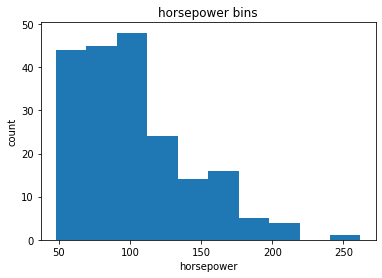

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
## membuat edge bin 4 value dengan min awal dan max akhir untuk digunakan dalam 3 bin([48-119], [119-190], [190-262])
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

## 
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

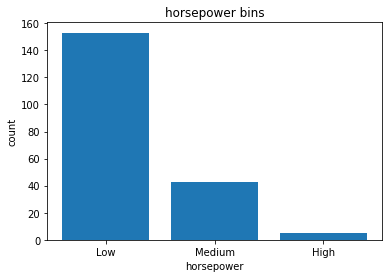

In [ ]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

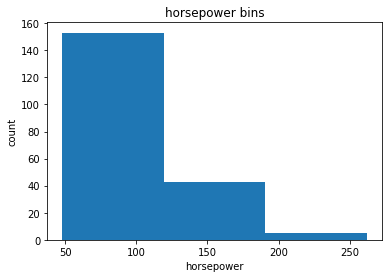

In [ ]:
# menggunakan historgram "horsepower" dengan bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### Indicator Variable

In [ ]:
## dummy variabel untuk mengkategorikan tipe bahan bakar
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_1.rename(columns={'gas':'bensin', 'diesel':'solar'}, inplace=True)
dummy_variable_1.head()

,solar,bensin
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# merge data frame "df" dg "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop "fuel-type"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,solar,bensin
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [ ]:
dummy_aspirasi = pd.get_dummies(df["aspiration"])
dummy_aspirasi.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
df = pd.concat([df, dummy_aspirasi], axis=1)
df.drop("aspiration", axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,solar,bensin,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


# Exploratory Data Analysis

In [ ]:
## melihat korelasi
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Continues Numerical Variable

### strong linear correlation
Melihat atribut mana yang memiliki korelasi yang kuat terhadap *price*

(0.0, 53228.55080277679)

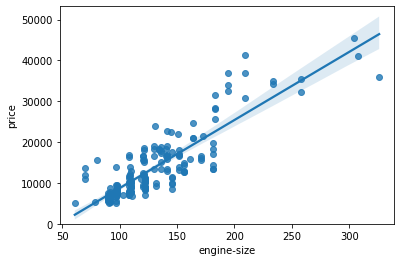

In [ ]:
import seaborn as sns

# Semakin besar engine semakin mahal
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
## test nilai korelasi
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


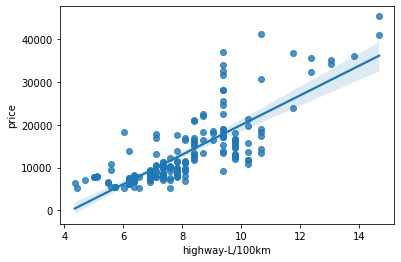

In [ ]:
## korelasi seberapa boros di jalan lepas terhadap harga
## semakin boros semakin murah
sns.regplot(x="highway-L/100km", y="price", data=df)

In [ ]:
df[["highway-L/100km", "price"]].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


### weak linear correlation

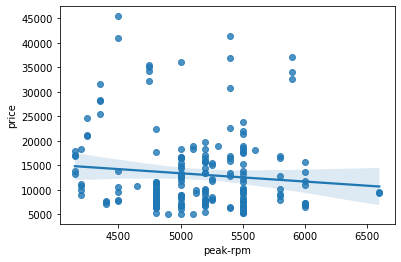

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


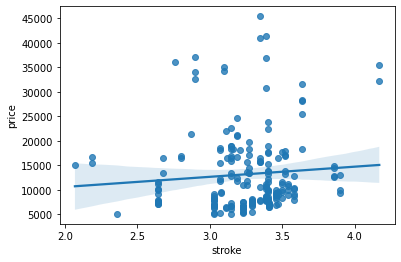

In [ ]:
sns.regplot(x="stroke", y="price", data=df)

### categorical variable

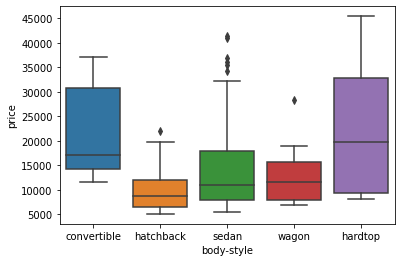

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

*body-style* terlalu overlapping antara satu dengan yang lain

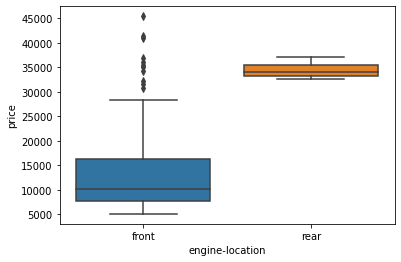

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

*engine-location* terlihat sangat kontras antar 2 variable sehingga potensial digunakan sebagai salah satu predictor

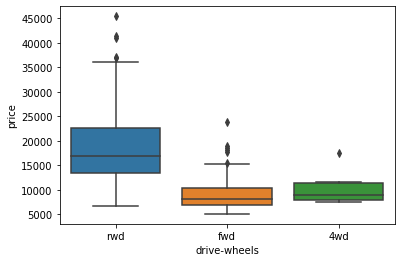

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)

*drive-wheels* terlihat cukup kontras antar satu sama lain sehingga potensial digunakan sebagai salah satu predictor

### Descriptive Statistical Analysis

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,solar,bensin,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include=object)
# df["num-of-doors"].value_counts()

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [ ]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [ ]:
# melihat value engine location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


engine-location memiliki data yang sangat timpang sehingga bukan merupakan predictor yang baik

## Grouping

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Membentuk grup untuk di analisa

In [ ]:
df_gptest = df[['drive-wheels','body-style','price']]
df_group_wheel = df_gptest.groupby(['drive-wheels', 'body-style'],as_index=False).mean()
df_group_wheel

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Ubah menjadi pivot agar lebih mudah dianalisa

In [ ]:
pivot_group = df_group_wheel.pivot(index='drive-wheels',columns='body-style')
pivot_group

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
## isi NaN dengan 0
pivot_group = pivot_group.fillna(0)
pivot_group

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
df_body = df[["body-style", "price"]]
df_body = df_body.groupby("body-style", as_index=False).mean()
df_body

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Visualisasikan dengan heatmap

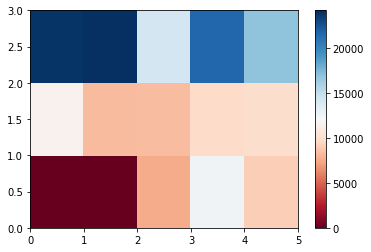

In [ ]:
plt.pcolor(pivot_group, cmap='RdBu')
plt.colorbar()
plt.show()

###Membuat heatmap lebih mudah *dibaca*

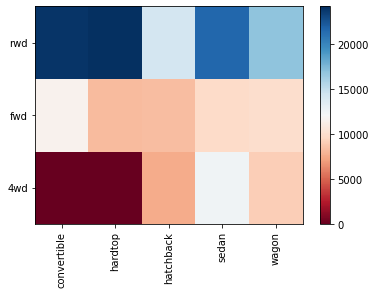

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot_group, cmap='RdBu')

#label names
row_labels = pivot_group.columns.levels[1]
col_labels = pivot_group.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot_group.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_group.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Menghitung korelasi dengan Pearson Corelation lebih jauh
dengan memperhitungkan p-value : 
* p-value is < 0.001: we say there is strong evidence that the correlation is significant
* the p-value is < 0.05: there is moderate evidence that the correlation is significant
* the p-value is < 0.1: there is weak evidence that the correlation is significant.
* the p-value is > 0.1: there is no evidence that the correlation is significant.

### wheel-base : price

In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


koefisien *wheel-base* terhadap *price* tidak begitu tinggi di angka 0,58 sedangkan p-value sangat kecil di 0,0001

### horsepower : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


koefisien *horsepower* terhadap *price* cukup tinggi di angka 0,8 dan p-value sangat kecil 0,001

### length : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


koefisien *length* terhadap *price* termasuk moderate dan p-value sangat kecil

### width : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


koefisien *width* terhadap *price* termasuk cukup tinggi dan p-value sangat kecil

### curb-weight : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


koefisien *curb-weight* terhadap *price* termasuk tinggi dan p-value sangat kecil

### engine-size : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


koefisien *engine-size* terhadap *price* termasuk tinggi dan p-value sangat kecil

### bore : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


koefisien *bore* terhadap *price* termasuk moderate dan p-value sangat kecil

### city-L/100km : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7898975136626943  with a P-value of P =  3.903106400939802e-44


koefisien *city-L/100km* terhadap *price* termasuk tinggi dan p-value sangat kecil(korelasi koefisien seharusnya negative karena semakin sedikit bahan bakar semakin baik)

### highway-L/100km : price

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P =  3.046784581041456e-46


koefisien *highway-L/100km* terhadap *price* termasuk tinggi dan p-value sangat kecil(korelasi koefisien seharusnya negative karena semakin sedikit bahan bakar semakin baik)

## ANOVA (Analysist of Variance)

### drive-wheels

In [ ]:
df_group_wheel2 = df_gptest[["drive-wheels", "price"]].groupby(["drive-wheels"])
df_group_wheel2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [ ]:
df_group_wheel2.get_group('rwd')['price']

0      13495.0
1      16500.0
2      16500.0
9      16430.0
10     16925.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 75, dtype: float64

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(df_group_wheel2.get_group('fwd')['price'], df_group_wheel2.get_group('rwd')['price'], df_group_wheel2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


nilai f-test tergolong tinggi dan p-value yang sangat kecil

### fwd & rwd

In [ ]:
f_val, p_val = stats.f_oneway(df_group_wheel2.get_group('fwd')['price'], df_group_wheel2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


nilai f-test tergolong tinggi dan p-value yang sangat kecil

### 4wd & rwd

In [ ]:
f_val, p_val = stats.f_oneway(df_group_wheel2.get_group('4wd')['price'], df_group_wheel2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


nilai f-test tergolong cukup tinggi dan p-value yang kecil

### 4wd & fwd

In [ ]:
f_val, p_val = stats.f_oneway(df_group_wheel2.get_group('4wd')['price'], df_group_wheel2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


nilai f-test tergolong rendah dan p-value yang cukup tinggi. hal ini menunjukan ekmungkinan kesamaan antara dua kategori tersebut 

## Kesimpulan
terdapat beberapa variabel yang dapat dijadikan acuan dalam menentukan harga mobil bekas diantaranya : 

Continuous numerical :

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical:

<ul>
    <li>Drive-wheels</li>
</ul>

## Model